'''
The idea here is to develop a preliminary geological model of the northern part of Rio Grande do Sul coastline, 
based on the conceptual model and respective paper by Troian, G. C., Reginato, P. A. R., Marquezan, R. G., 
& Kirchheim, R. (2020). Modelo conceitual hidroestratigráfico do sistema  aquifero costeiro no litoral norte 
do Estado do Rio Grande Do Sul. 

This paper is available at https://rigeo.cprm.gov.br/bitstream/doc/21817/1/Troian_etal_2020.pdf.
'''


In [1]:
# Importing GemPy
import gempy as gp

# Importing auxiliary libraries
import numpy as np
import geopandas as gpd
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
import osgeo
import os
import pyvista as pv

Not subsurface compatibility available


In [2]:
# Return current working directory
cwd = os.getcwd()
data_path = cwd

In [3]:
# Creating the model
geo_model = gp.create_model('Modelo_LN')

In [4]:
# Defining the Area of Interest (AOI) limits:

# Regular grid extent currently in use
AOI_limits_regular = [542000, 630000, 6655000, 6776000, -200, 50]

# Custom grid extent I'm expecting to get
AOI_limits_custom = (np.array([[598966,6774879, -200],
                               [628406,6755377, -200],
                               [577976,6655121, -200],
                               [548422,6674680, -200]]))

In [5]:
# Defining the grid

grid = gp.Grid()

# Setting the custom grid - NOT WORKING SO FAR
#grid = geo_model.set_custom_grid(AOI_limits_custom)

# Setting the regular grid
grid = geo_model.set_regular_grid(AOI_limits_regular, resolution=[100, 100, 100])

Active grids: ['regular']


In [6]:
# Importing data
geo_model = gp.init_data(geo_model,
                         path_o=data_path + '/Gempy_files/Gempy_input_orientations_troian_2020.csv',
                         path_i=data_path + '/Gempy_files/Gempy_input_surfaces_troian_2020.csv')

/home/luciano/mambaforge/envs/gempy/lib/python3.7/site-packages/gempy/gempy_api.py:180: UserWarning: Regular grid won't be initialize, you will have to create a gridafterwards. See gempy.set_grid
  warnings.warn('Regular grid won\'t be initialize, you will have to create a gridafterwards. See gempy.set_grid')


/home/luciano/mambaforge/envs/gempy/lib/python3.7/site-packages/gempy/plot/plot_api.py:261: UserWarning: Matplotlib is currently using module://matplotlib_inline.backend_inline, which is a non-GUI backend, so cannot show the figure.
  p.fig.show()


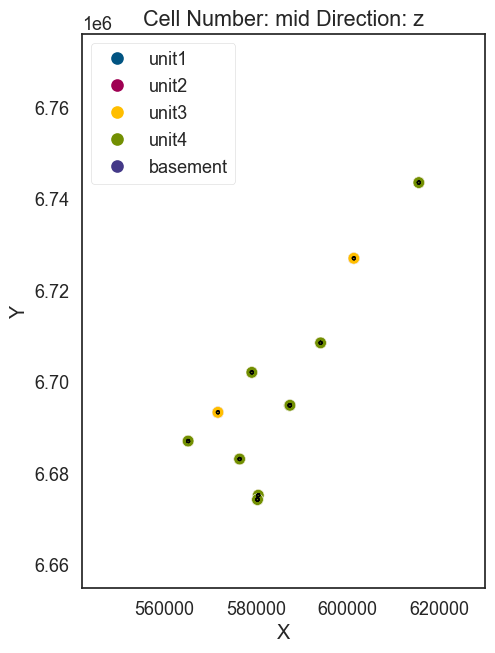

In [7]:
#Check area of interest coordinates
fig_2D = gp.plot_2d(geo_model, direction=['z'])

In [ ]:
'''For some reason when using this line the top unit with data points (unit1) ends up being set as not active, and even activating it results in failure in the computing of the geological model. Thus, until we discover what is causing this this piece of code will not be used.

#Add surfaces and define names to match the ones in the paper. In this case surface and series have the same name, but in the future as more detail is given to the model each series will have more surfaces.

gp.map_stack_to_surfaces(geo_model,
                         {"Sea": ('sea'),
                          "Unit1": ('unit1'),
                          "Unit2": ('unit2'),
                          "Unit3": ('unit3'),
                          "Unit4": ('unit4'),
                          "Pelotas_Basin_Lower": ('pelotas_lower'),
                          "Paraná_Basin_Undifferentiated": ('parana_basin'),
                          "Basement": ('basement')},
                          remove_unused_series=True)

#Change colours to match (approximately) the ones from the Troian et al. (2020):
colordict = {'unit1': '#FFEC8B', 'unit2': '#CDC8B1', 'unit3': '#FFFF00', 'unit4': '#EE3B3B', 'basement': '#8B5A2B'}

#for later on when have more points:
# 'pelotas_lower': '#FF6103', 'parana_basin': '#458B00'} 

geo_model.surfaces.colors.change_colors(colordict)

geo_model.surfaces

'''

In [9]:
# Check which surfaces are active:
geo_model.surfaces.df

,surface,series,order_surfaces,isBasement,isFault,isActive,hasData,color,vertices,edges,sfai,id
0,unit1,Default series,1,False,False,True,True,#015482,NaN,NaN,NaN,1
1,unit2,Default series,2,False,False,True,True,#9f0052,NaN,NaN,NaN,2
2,unit3,Default series,3,False,False,True,True,#ffbe00,NaN,NaN,NaN,3
3,unit4,Default series,4,False,False,True,True,#728f02,NaN,NaN,NaN,4
4,basement,Basement,1,True,False,True,False,#443988,NaN,NaN,NaN,5


/home/luciano/mambaforge/envs/gempy/lib/python3.7/site-packages/gempy/plot/plot_api.py:261: UserWarning: Matplotlib is currently using module://matplotlib_inline.backend_inline, which is a non-GUI backend, so cannot show the figure.
  p.fig.show()


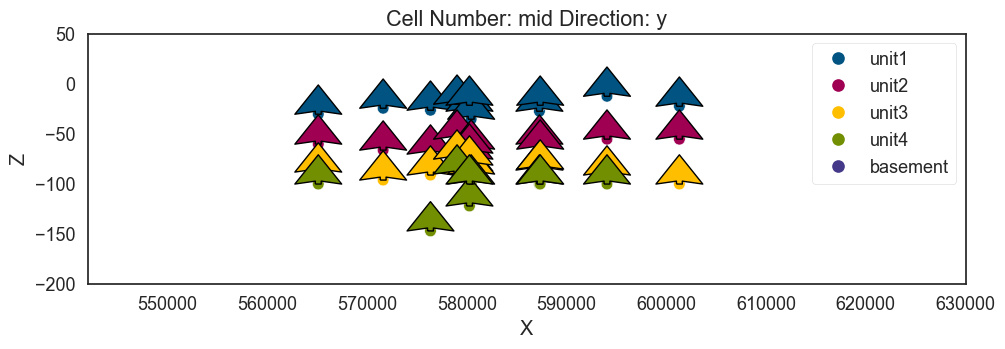

In [13]:
# Plotting points in 2D
gp.plot_2d(geo_model, direction=['y'], ve=100, show_topography=False)

In [14]:
# Plotting points in 3D
gp.plot_3d(geo_model, notebook=False, ve=100, plotter_type='background', show_topography=False)

/home/luciano/mambaforge/envs/gempy/lib/python3.7/site-packages/pyvista/utilities/helpers.py:508: UserWarning: Points is not a float type. This can cause issues when transforming or applying filters. Casting to ``np.float32``. Disable this by passing ``force_float=False``.
  'Points is not a float type. This can cause issues when '


In [15]:
# Setting the interpolator so ir can compute the model
gp.set_interpolator(geo_model, theano_optimizer='fast_compile', verbose=[])

Setting kriging parameters to their default values.
Compiling theano function...
Level of Optimization:  fast_compile
Device:  cpu
Precision:  float64
Number of faults:  0
Compilation Done!
Kriging values: 
                            values
range               149616.384464
$C_o$            532977678.571429
drift equations            [3, 3]


In [16]:
#Compute model
gp.compute_model(geo_model)


Lithology ids 
  [5. 5. 5. ... 1. 1. 1.] 

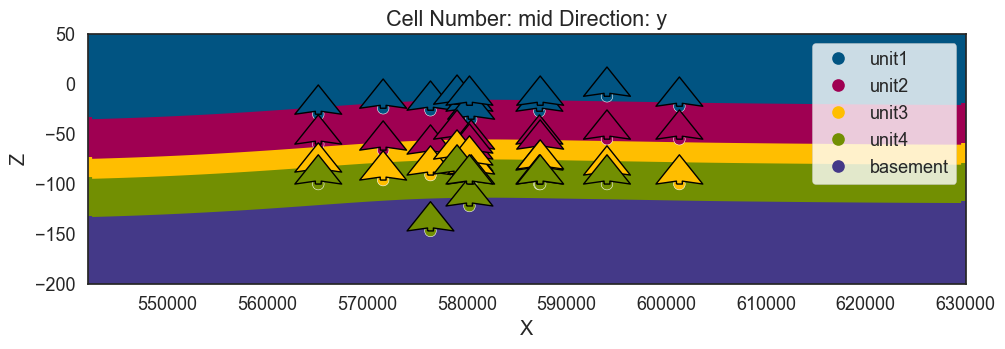

In [18]:
#Plotting the model in 2D with 100x vertical exageration
gp.plot_2d(geo_model, direction=['y'], ve=100, show_topography=False)

In [24]:
# Plotting the model in 3D (with 100x vertical exaggeration)
gp.plot_3d(geo_model, notebook=False, ve=100, plotter_type='background', show_topography=False)

In [19]:
# Adding the topography (DEM from http://www.dsr.inpe.br/topodata/ and merged in one file)
geo_model.set_topography(source='gdal', filepath='/home/luciano/Yandex.Disk/Raw_Data_for_Projects/Litoral_norte/DEM_AOI_low_res.tif')

Cropped raster to geo_model.grid.extent.
depending on the size of the raster, this can take a while...
storing converted file...
Active grids: ['regular' 'topography']


Grid Object. Values: 
array([[ 5.42440000e+05,  6.65560500e+06, -1.98750000e+02],
       [ 5.42440000e+05,  6.65560500e+06, -1.96250000e+02],
       [ 5.42440000e+05,  6.65560500e+06, -1.93750000e+02],
       ...,
       [ 6.29849829e+05,  6.77524938e+06,  0.00000000e+00],
       [ 6.29849829e+05,  6.77554963e+06,  0.00000000e+00],
       [ 6.29849829e+05,  6.77584988e+06,  0.00000000e+00]])

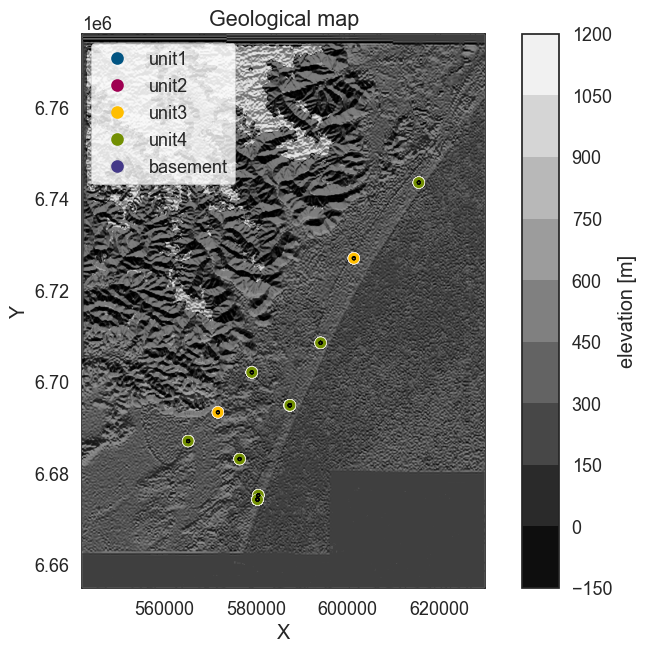

In [20]:
# Making a 2D visualization:
gp.plot_2d(geo_model, show_topography=True, section_names=['topography'], show_lith=False,
           show_boundaries=False, 
           kwargs_topography={'cmap': 'gray', 'norm': None}
           )
plt.show()

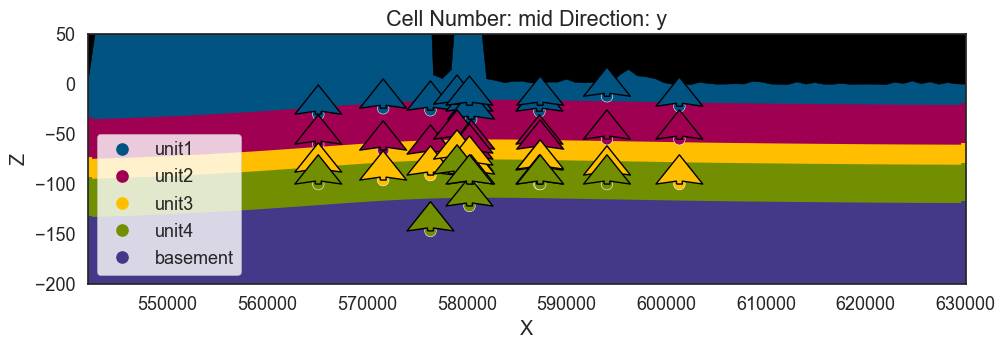

In [21]:
# Plotting topography 2D (with 100x vertical exaggeration)
gp.plot_2d(geo_model, direction=['y'], ve=100, show_topography=True)

In [23]:
# Plotting topography 3D (with 100x vertical exaggeration)
gp.plot_3d(geo_model, notebook=False, ve=100, plotter_type='background', show_topography=True)